In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_context('paper')
sns.set_style('ticks')

In [9]:
def dCrawler(data, threshold):
    """
    dCrawler clustering algorithm.
    
    Args:
        data (numpy.ndarray): The input data as a 2D numpy array.
        threshold (float): The distance threshold for clustering.
    
    Returns:
        list: A list of cluster assignments for each data point.
    """
    n_samples = data.shape[0]
    clusters = [0] * n_samples
    centroids = []
    
    # Initial crawl --> I think this is wrong because you are crawling per sample and not updating the clusters with the nearest point
    for i in range(n_samples):
        if clusters[i] == 0: #If the point is unallocated, 
            clusters[i] = len(centroids) + 1 #then asign it to a new cluster
            centroids.append(data[i].astype(float))  #add the point to the centroids position
        else:
            distances = np.linalg.norm(centroids - data[i].astype(float), axis=1) #calculate the distances of the point to the centroids
            nearest_cluster = np.argmin(distances) + 1 #find the nearest cluster
            if distances[nearest_cluster - 1] <= threshold:
                clusters[i] = nearest_cluster #add the point to the nearest cluster
            else:
                clusters[i] = len(centroids) + 1 #point is beyond the threshold to the nearest cluster then asign it a new value
                centroids.append(data[i].astype(float)) #add the point to the centroids list
    
    while True:
        # Adjustment step
        new_centroids = [np.zeros_like(c) for c in centroids]
        counts = [0] * len(centroids)
        
        for i in range(n_samples): #This loop  adds the point to counts and new centroids
            cluster_id = clusters[i] - 1
            new_centroids[cluster_id] += data[i].astype(float)
            counts[cluster_id] += 1
        
        for i in range(len(centroids)):
            if counts[i] > 0:
                new_centroids[i] = (new_centroids[i] / counts[i]).astype(data.dtype)
        
        centroids = new_centroids
        
        # Re-allocation step
        for i in range(n_samples):
            distances = np.linalg.norm(centroids - data[i].astype(float), axis=1)
            clusters[i] = np.argmin(distances) + 1
        
        # Merge step
        merged = True
        while merged:
            merged = False
            for i in range(len(centroids)):
                if counts[i] == 0:
                    continue
                for j in range(i+1, len(centroids)):
                    if counts[j] == 0:
                        continue
                    if np.linalg.norm(centroids[i] - centroids[j]) <= threshold:
                        for k in range(n_samples):
                            if clusters[k] == j+1:
                                clusters[k] = i+1
                        counts[j] = 0
                        merged = True
            centroids = [c for i, c in enumerate(centroids) if counts[i] > 0]
            counts = [c for c in counts if c > 0]
        
        # Check for convergence
        if not merged:
            break
    
    return clusters, centroids

In [10]:
# Generate sample data
# data = np.concatenate([
#     np.random.randn(50, 2) + [0, 0],
#     np.random.randn(50, 2) + [5, 5],
#     np.random.randn(50, 2) + [10, 10]
# ])

# Exxtract demo data
import pandas as pd
data_path = "../DemoData/demodata.csv"
df = pd.read_csv(data_path)
display(df.head())

# Convert df to numpy
data = df.to_numpy()[:,:2]
print(data[:5,:])

,x,y,Cluster
0,1.179043,2.344553,1
1,1.610684,2.242053,1
2,0.247804,1.898954,1
3,1.287104,2.097859,1
4,1.106149,1.737835,1


[[1.17904316 2.34455277]
 [1.61068371 2.24205275]
 [0.247804   1.89895417]
 [1.28710372 2.0978592 ]
 [1.10614882 1.73783483]]


In [19]:
#th_range = np.linspace(0.1, 5, 6)
th_range = [0.01, 0.1, 0.25, 0.5, 1, 1.5, 2, 5]
print(len(th_range))
print(th_range)

8
[0.01, 0.1, 0.25, 0.5, 1, 1.5, 2, 5]


In [20]:
clusterings = [dCrawler(data, th) for th in th_range]

In [21]:
#View clusters
print(len(clusterings[-1]))

250


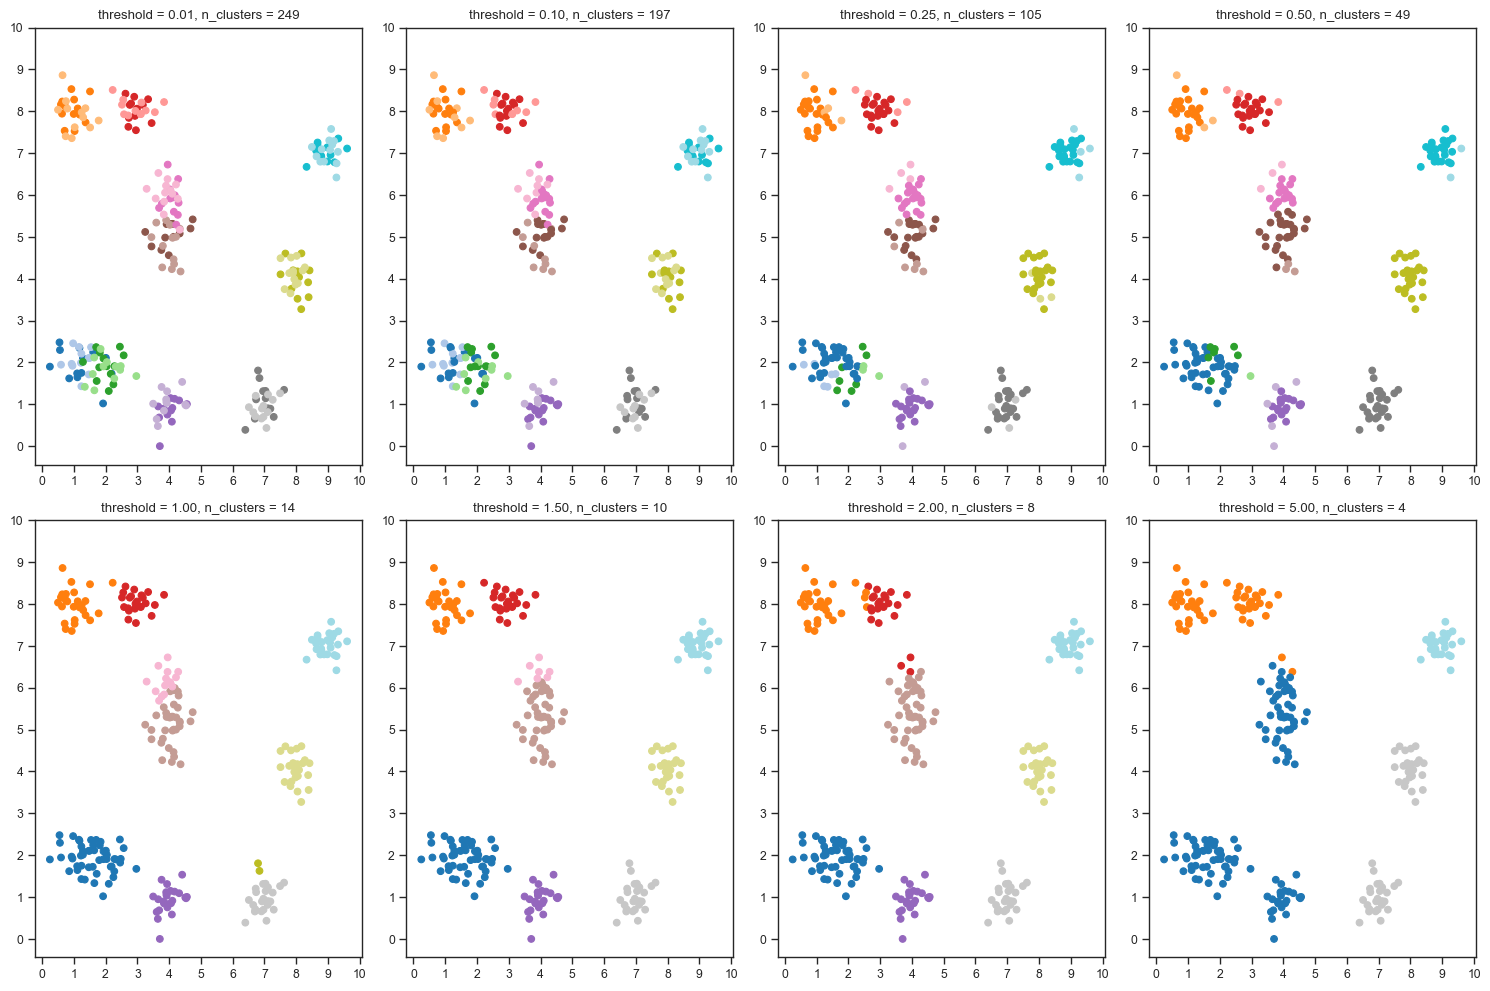

In [29]:
fig,ax = plt.subplots(2, int(len(th_range)/2), figsize=(15, 10))
row,col = 0,0
for i, clusters in enumerate(clusterings):
    ax[row,col].scatter(data[:,0], data[:,1], c=clusters, cmap='tab20')
    ax[row,col].set_title(f'threshold = {th_range[i]:.2f}, n_clusters = {len(set(clusters))}')
    ax[row,col].set_xticks(np.linspace(0, 10, 11))
    ax[row,col].set_yticks(np.linspace(0, 10, 11))
    col += 1
    if col >= int(len(th_range)/2):
        row += 1
        col = 0
plt.tight_layout()
plt.show();